# 回归问题

## 数据预处理

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

## 读取数据
datapath = ""
abalone = pd.read_csv(datapath + "abalone.csv")

## 数据处理
## 去除Height为0的两条数据
abalone = abalone[~abalone['Height'].isin([0])]
## 将Rings属性加上1.5生成年龄Ages属性，并将原来Rings属性删除
abalone['Rings'] = abalone['Rings'] + 1.5
abalone.rename(columns={'Rings':'Ages'}, inplace=True)

## 读取表头
header = abalone.columns.values

## 描述性统计
## 设置下面这些方程显示的格式为全部列都显示
pd.set_option('display.max_columns', None)

## 查看前5行数据
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Ages
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [2]:
## 描述性统计
## 快速获取数据集的简单描述
abalone.info()

## 显示数值属性的摘要，包括最小值、最大值、标准差、均值等
abalone.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   object 
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Whole weight    4175 non-null   float64
 5   Shucked weight  4175 non-null   float64
 6   Viscera weight  4175 non-null   float64
 7   Shell weight    4175 non-null   float64
 8   Ages            4175 non-null   float64
dtypes: float64(8), object(1)
memory usage: 326.2+ KB


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Ages
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,11.435090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,9.500000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,12.500000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000



观测结果发现Height最大值达到1.13，Whole weight最大值达到2.8255，Shucked weight最大值达到1.488，均为异常值


In [3]:
## 设定误差超过（μ-3σ, μ+3σ）区间的数值为异常值
def three_sigma(ser):
    # 平均值
    mean_data = ser.mean()
    # 标准差
    std_data = ser.std()
    # 超过（μ-3σ, μ+3σ）区间为异常值
    rule = (mean_data - 3*std_data > ser) | (mean_data+3*std_data < ser)
    # np.arange方法生成一个从0开始，到ser长度-1结束的连续索引，再保留所有异常值的行索引
    index = np.arange(ser.shape[0])[rule]
    # 获取异常值
    outliers=ser.iloc[index]
    print(index)
    return outliers


In [4]:
## 删除异常值
for i in range(1,abalone.shape[1]):
    delete = three_sigma(abalone[header[i]])
    abalone = abalone.drop(delete.index,axis=0)
abalone = abalone.reset_index(drop=True)
abalone.info()

[ 236  237  238  239  526  696  719  720 1428 1985 1986 2113 2380 3898
 3901]
[ 689 2156 3823]
[1165 1407 2038]
[ 165  354  882 1042 1043 1197 1199 1415 1749 1750 2316 2604 2605 2792
 2844 3408 3580 3696 3781]
[1036 1178 1182 1184 1187 1191 1399 1407 1506 1507 1733 1735 1740 1798
 1959 2514 2593 2643 2678 2778 2829 2973 3048 3677 3920 3921]
[ 169 1184 1396 1724 1726 2659 3569 4080]
[  81  129  163  164  165  166  167  271  328 1397 1781 1942 2044 2062
 2110 2114 2160 2226 2319 2946 3085 3086 3088 3125 3856 4070]
[   6   72   82  172  223  257  262  264  280  296  299  300  336  340
  346  359  400  401  412  415  417  453  462  464  485  513  555  611
  656  657  658  661  723  733  735  790 2112 2116 2135 2137 2144 2209
 2239 2268 2277 2291 2367 2390 2402 3057 3106 3193 3272 3828 3833 3847]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4019 entries, 0 to 4018
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 

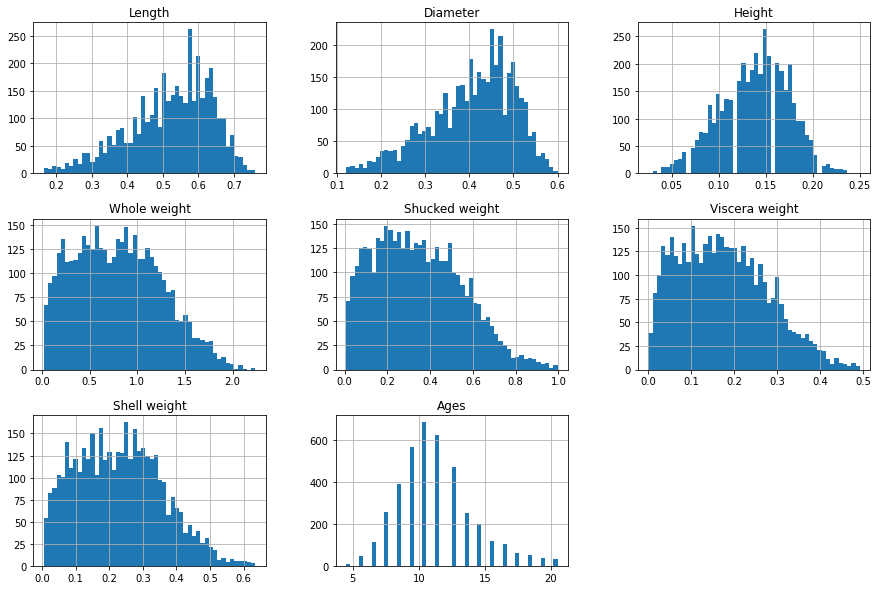

In [5]:
## 绘制属性直方图
abalone.hist(bins=50, figsize=(15,10))
plt.show()

In [6]:
## 计算数据间每对属性之间的相关系数
corr_matrix = abalone.corr()
print(corr_matrix)

                  Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.985937  0.897066      0.935042        0.909986   
Diameter        0.985937  1.000000  0.903438      0.934751        0.905018   
Height          0.897066  0.903438  1.000000      0.893541        0.844490   
Whole weight    0.935042  0.934751  0.893541      1.000000        0.970879   
Shucked weight  0.909986  0.905018  0.844490      0.970879        1.000000   
Viscera weight  0.908060  0.904311  0.871194      0.966439        0.929891   
Shell weight    0.914935  0.922322  0.901217      0.961035        0.895850   
Ages            0.566675  0.584563  0.613163      0.549236        0.440779   

                Viscera weight  Shell weight      Ages  
Length                0.908060      0.914935  0.566675  
Diameter              0.904311      0.922322  0.584563  
Height                0.871194      0.901217  0.613163  
Whole weight          0.966439      0.961035  0.549236  
Shucked weig

array([[<AxesSubplot:xlabel='Length', ylabel='Length'>,
        <AxesSubplot:xlabel='Diameter', ylabel='Length'>,
        <AxesSubplot:xlabel='Height', ylabel='Length'>,
        <AxesSubplot:xlabel='Whole weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Shucked weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Viscera weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Shell weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Ages', ylabel='Length'>],
       [<AxesSubplot:xlabel='Length', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Diameter', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Height', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Whole weight', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Shucked weight', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Viscera weight', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Shell weight', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Ages', ylabel='Diameter'>],
       [<AxesSubplot:xlabel='L

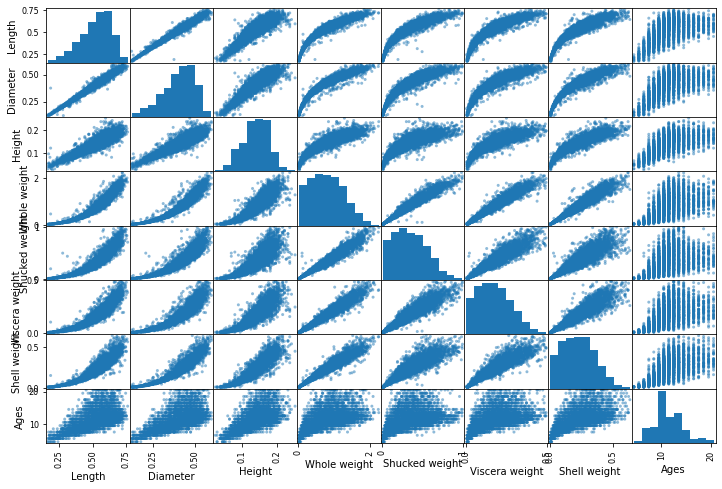

In [7]:
from pandas.plotting import scatter_matrix
## 选取相关度较高变量绘制相关关系散点图
attributes = header[1:]
scatter_matrix(abalone[attributes], figsize=(12, 8))


In [8]:
# 将x属性和y属性分开
y = abalone['Ages'].copy()
x = abalone.drop('Ages', axis=1)

In [9]:
# 将性别数据转换为独热向量
Sex_onehot=pd.get_dummies(x['Sex'],prefix='Sex')
x[Sex_onehot.columns]=Sex_onehot
x = x.drop('Sex', axis=1)
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


In [10]:
# 将数值型属性标准化
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('sc', StandardScaler())])

# 数据标准化 
pipe.fit(x)
x_trans = pipe.transform(x)
print(x_trans)

[[-0.56884192 -0.41935203 -1.17036329 ... -0.67071283 -0.69933542
   1.32962639]
 [-1.47715298 -1.46461114 -1.30658762 ... -0.67071283 -0.69933542
   1.32962639]
 [ 0.07995169  0.15554049 -0.08056861 ...  1.49095105 -0.69933542
  -0.75209097]
 ...
 [ 0.6854924   0.730433    1.82657208 ... -0.67071283 -0.69933542
   1.32962639]
 [ 0.90175694  0.83495891  0.32810439 ...  1.49095105 -0.69933542
  -0.75209097]
 [ 1.63705637  1.56664028  1.55412341 ... -0.67071283 -0.69933542
   1.32962639]]


## 建立模型

In [11]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVR
from sklearn.svm import SVR


# 10折交叉验证
k_fold = KFold(n_splits=10,shuffle=True,random_state=42)

### 线性回归

In [12]:
# 对数据直接进行线性回归
RMSE = []
for train_index, test_index in k_fold.split(x_trans):
    train_x, test_x = x_trans[train_index], x_trans[test_index]
    train_y, test_y = y[train_index], y[test_index]
    
    # 线性回归
    LinearModel = LinearRegression(fit_intercept=True,n_jobs=-1)
    LinearModel.fit(train_x,train_y)
    y_pre = LinearModel.predict(test_x)

    RMSE.append(sqrt(MSE(y_pre,test_y)))

print("RMSE:",sum(RMSE) / len(RMSE))

RMSE: 1.978560626945407


In [13]:
# 观察散点图发现，Ages和Length、Diameter、Height具有明显的线性关系
# Ages和Whole weight、Shucked weight、Viscera weight与Shell weight存在对数关系
x_log = x
for i in range(4,8):
    x_log[header[i]] = np.log(x_log[header[i]])

# 数据标准化 
pipe.fit(x_log)
x_log = pipe.transform(x_log)

RMSE = []
for train_index, test_index in k_fold.split(x_log):
    train_x, test_x = x_log[train_index], x_log[test_index]
    train_y, test_y = y[train_index], y[test_index]
    
    # 线性回归
    LinearModel = LinearRegression(fit_intercept=True,n_jobs=-1)
    LinearModel.fit(train_x,train_y)
    y_pre = LinearModel.predict(test_x)

    RMSE.append(sqrt(MSE(y_pre,test_y)))

print("RMSE:",sum(RMSE) / len(RMSE))

RMSE: 1.9659392257760213


### 决策树

In [14]:
# 决策树模型
RMSE = []

for train_index, test_index in k_fold.split(x_trans):
    train_x, test_x = x_trans[train_index], x_trans[test_index]
    train_y, test_y = y[train_index], y[test_index]
    
    # 决策树
    DecisionTreeModel = DecisionTreeClassifier(criterion='entropy')
    DecisionTreeModel = DecisionTreeModel.fit(train_x,train_y.astype(int))
    y_pre = DecisionTreeModel.predict(test_x)
    RMSE.append(sqrt(MSE(y_pre,test_y.astype(int))))

print("RMSE:",sum(RMSE) / len(RMSE))

RMSE: 2.6389574711156145


### SVM

In [15]:
# SVM模型 线性核函数
RMSE = []

for train_index, test_index in k_fold.split(x_trans):
    train_x, test_x = x_trans[train_index], x_trans[test_index]
    train_y, test_y = y[train_index], y[test_index]
    
    SVMLinearModel = LinearSVR()
    SVMLinearModel = SVMLinearModel.fit(train_x,train_y)
    y_pre = SVMLinearModel.predict(test_x)
    RMSE.append(sqrt(MSE(y_pre,test_y)))

print("RMSE:",sum(RMSE) / len(RMSE))

RMSE: 2.0128657414610744


In [16]:
# SVM模型 高斯核函数
RMSE = []

for train_index, test_index in k_fold.split(x_trans):
    train_x, test_x = x_trans[train_index], x_trans[test_index]
    train_y, test_y = y[train_index], y[test_index]
    
    SVRModel = SVR(kernel='rbf')
    SVRModel = SVRModel.fit(train_x,train_y)
    y_pre = SVRModel.predict(test_x)
    RMSE.append(sqrt(MSE(y_pre,test_y)))

print("RMSE:",sum(RMSE) / len(RMSE))

RMSE: 1.94690838666626


## 实验结论
结合实验过程和实验结果可知，随着年龄增大，变量变化具有明显的线性关系。故线性回归模型和SVM模型更适用于此数据集。